# SpatialMouse revision - Answer query 4

In [1]:
## The following code ensures that all functions and init files are reloaded before executions.
%load_ext autoreload
%autoreload 2

In [2]:
## Import the custom library
import os
import sys

# add xDbit toolbox path to path variable
module_path = os.path.abspath("../../")
if module_path not in sys.path:
    sys.path.append(module_path)

import xdbit_funcs as db

In [3]:
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from glob import glob
from pathlib import Path
import seaborn as sns
import gc
import anndata

In [4]:
plt.rcParams['figure.dpi'] = 100
plt.style.use('default')

# Load data

In [5]:
# get files
input_file = "out/Kidney_adata_pp_wohires.h5ad"

In [6]:
adata = sc.read(input_file)

In [7]:
adata

AnnData object with n_obs × n_vars = 4099 × 15027
    obs: 'array_row', 'array_col', 'um_row', 'um_col', 'id', 'pixel_row', 'pixel_col', 'dapi_mean', 'dapi_mean_norm', 'experiment_id', 'organism', 'age', 'organ', 'age_months', 'mouse_id', 'exp_date', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'CT010467.1_pct', 'leiden_uncorrected', 'leiden'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'experiment_id_colors', 'hvg', 'id_colors', 'leiden', 'leiden_colors', 'log1p', 'matchedVis', 'neighbors', 'neighbors_uncorrected', 'organ_colors', 'pca', 'registered', 'spatial', 'tsne', 'umap'
    obsm: 'X_emb', 'X_pca', 'X_scanorama', 'X_tsne', 'X_umap', 'spatial'
    varm: 'PCs'
    layers: 'counts', 'norm_counts'
    obsp: 'connectivities', 'distances', 'neighbors_uncorrected_connectivities', 'ne

## Plots for revision

Saving figure to file figures/stripe_effect/spatial-counts_raw.pdf
Saved.


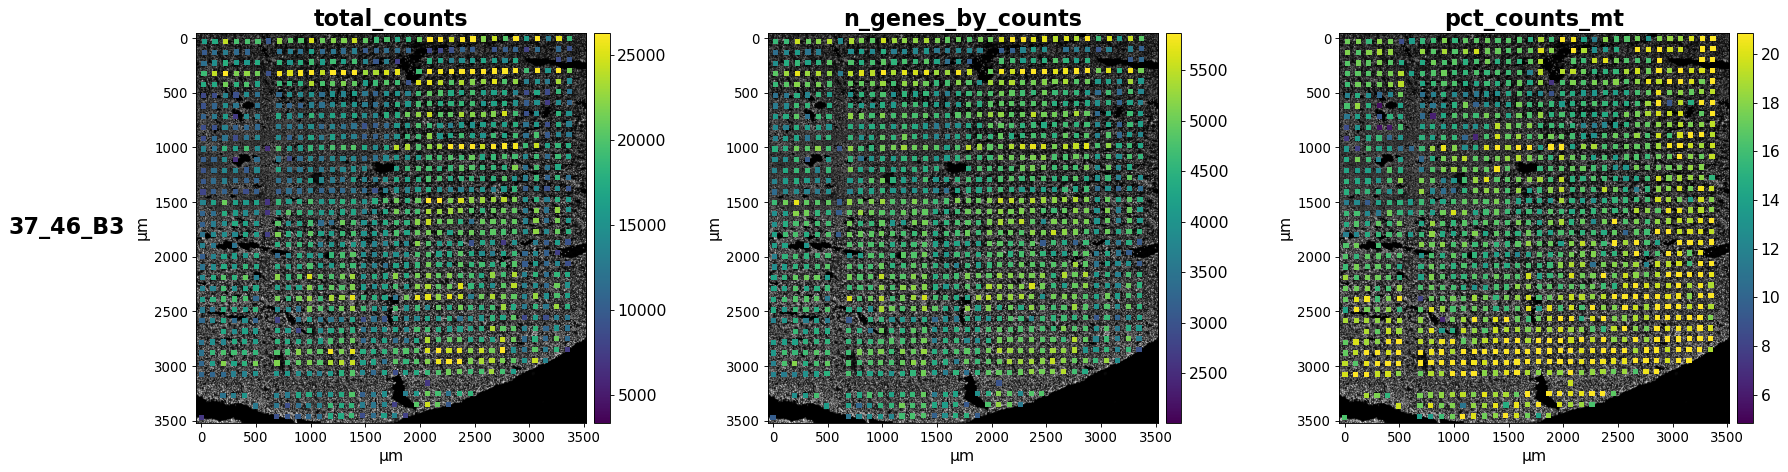

In [16]:
db.pl.spatial(adata, keys=['total_counts', 'n_genes_by_counts', 'pct_counts_mt'], 
              groupby="id",
              groups="37_46_B3", 
              image_key='dapi',
              savepath="figures/stripe_effect/spatial-counts_raw.pdf"             
             )

Saving figure to file figures/stripe_effect/spatial-Actb_norm.pdf
Saved.


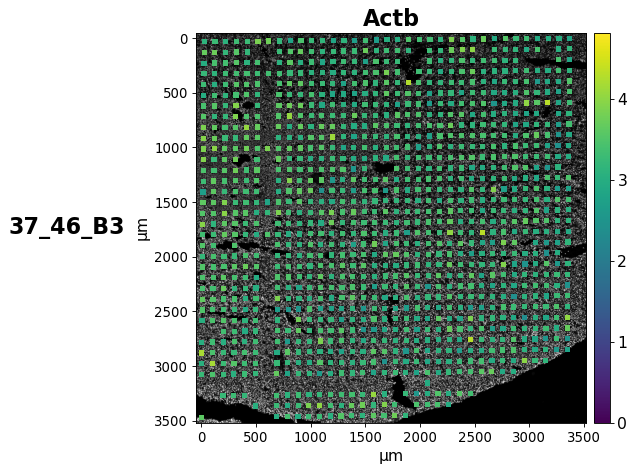

In [14]:
db.pl.spatial(adata, keys=['Actb'], 
              groupby="id",
              groups="37_46_B3", 
              image_key='dapi',
              savepath="figures/stripe_effect/spatial-Actb_norm.pdf"
             )

Saving figure to file figures/stripe_effect/spatial-Actb_raw.pdf
Saved.


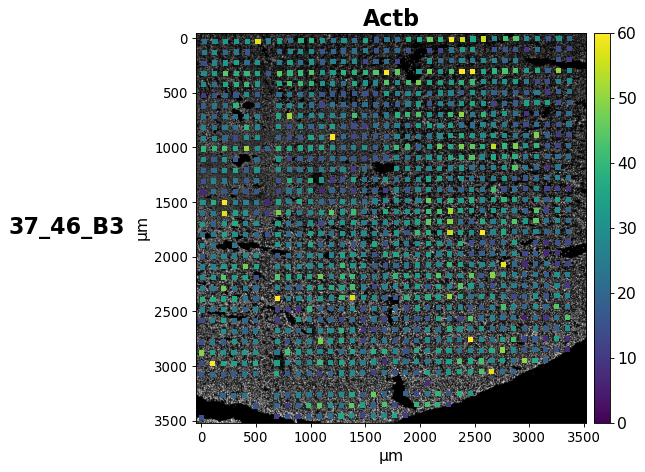

In [15]:
db.pl.spatial(adata, keys=['Actb'], layer="counts",
              groupby="id",
              groups="37_46_B3", 
              image_key='dapi', crange=(0, 60),
              savepath="figures/stripe_effect/spatial-Actb_raw.pdf"
             )